# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

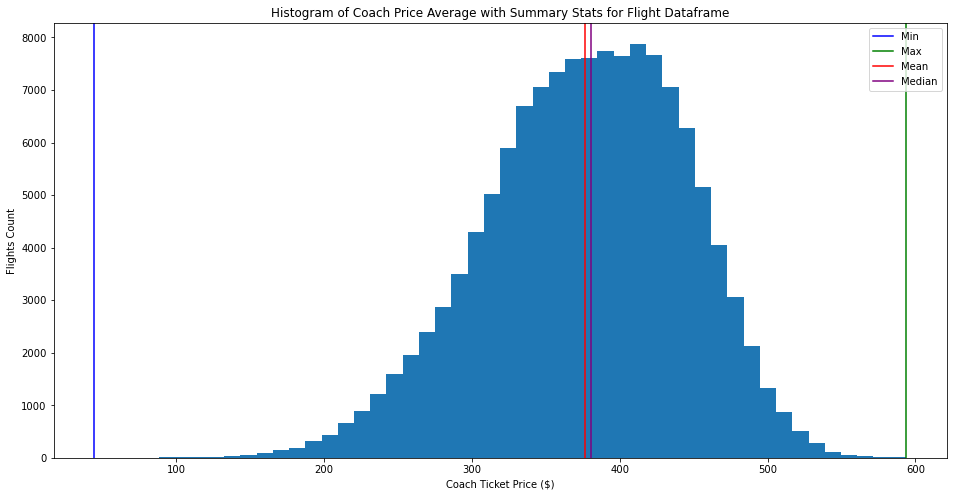

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")

## Task 1
plt.figure(figsize=(16,8))
plt.hist(flight.coach_price, bins=50)
plt.axvline(flight.coach_price.min(), color='blue', label='Min')
plt.axvline(flight.coach_price.max(), color='green', label='Max')
plt.axvline(flight.coach_price.mean(), color='red', label='Mean')
plt.axvline(flight.coach_price.median(), color='purple', label='Median')
plt.title('Histogram of Coach Price Average with Summary Stats for Flight Dataframe')
plt.xlabel('Coach Ticket Price ($)')
plt.ylabel('Flights Count')
plt.legend()
plt.show()

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

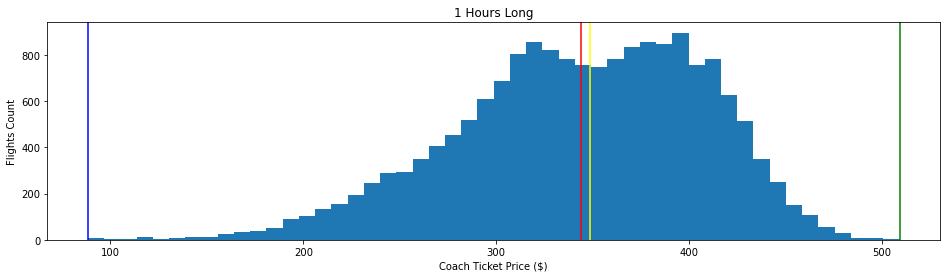

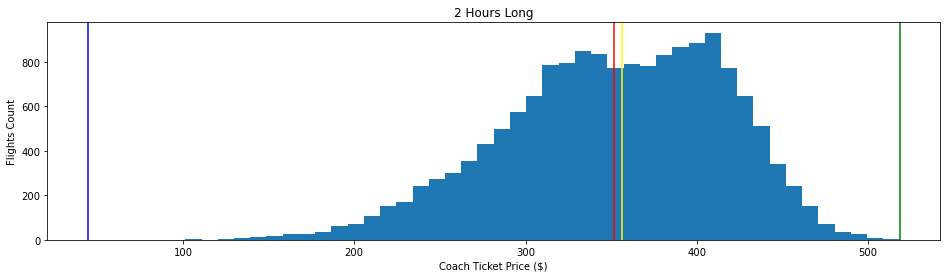

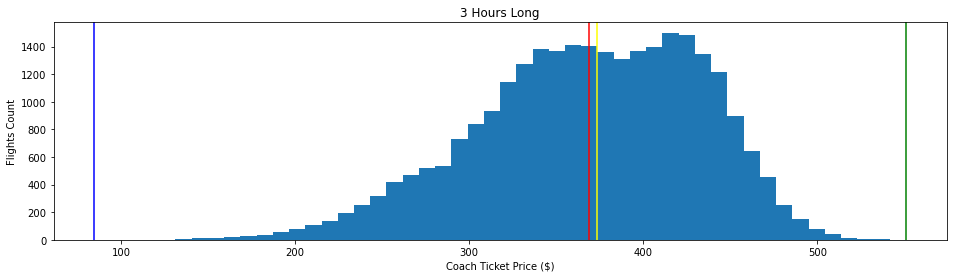

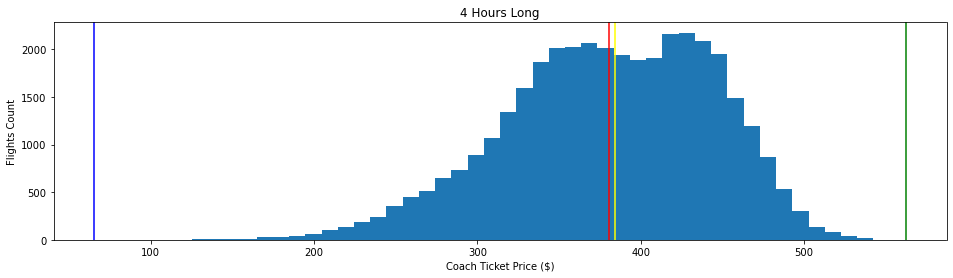

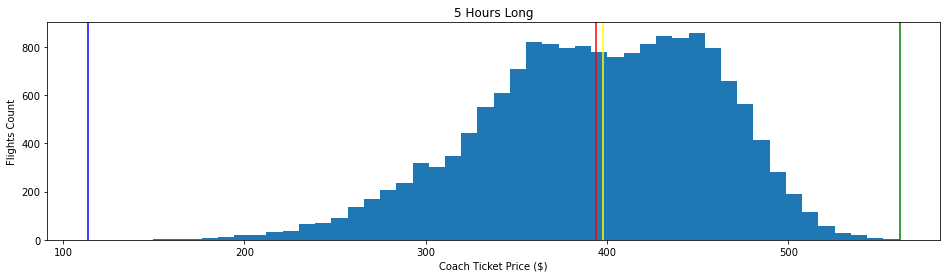

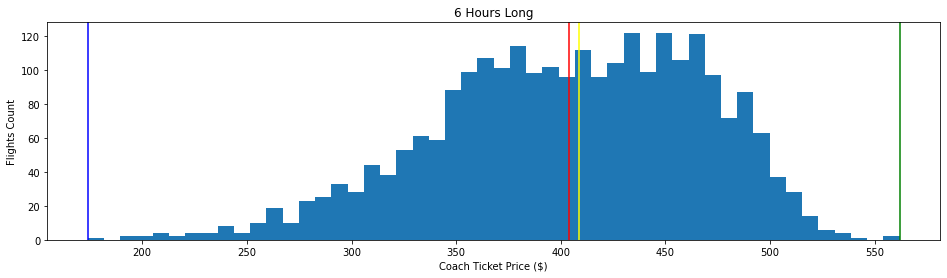

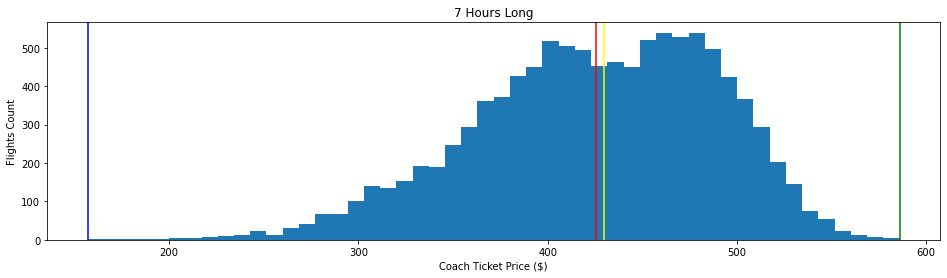

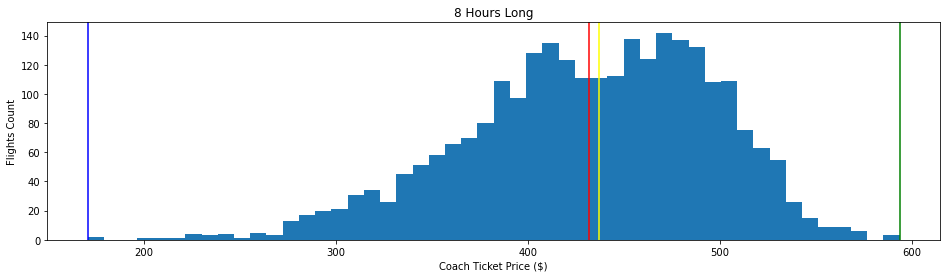

In [8]:
## Task 2
hours = range(1,9)

for hour in hours:
    df= flight[flight.hours == hour]
    plt.figure(figsize=(16,4))
    plt.hist(df.coach_price, bins=50)
    plt.axvline(df.coach_price.min(), color='blue')
    plt.axvline(df.coach_price.max(), color='green')
    plt.axvline(df.coach_price.mean(), color='red')
    plt.axvline(df.coach_price.median(), color='yellow')
    plt.title('{} Hours Long'.format(hour))
    plt.xlabel('Coach Ticket Price ($)')
    plt.ylabel('Flights Count')
    plt.show()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

Max Delay detected after removing outliners is : 58
Min Delay: 1
Min Delay: 13.037894948176776
Median Delay: 11.0
Dataframe total lenght: 129780
Flight with delay > 0: 119541
Percentage of flights with delay in dataframe: 92.11


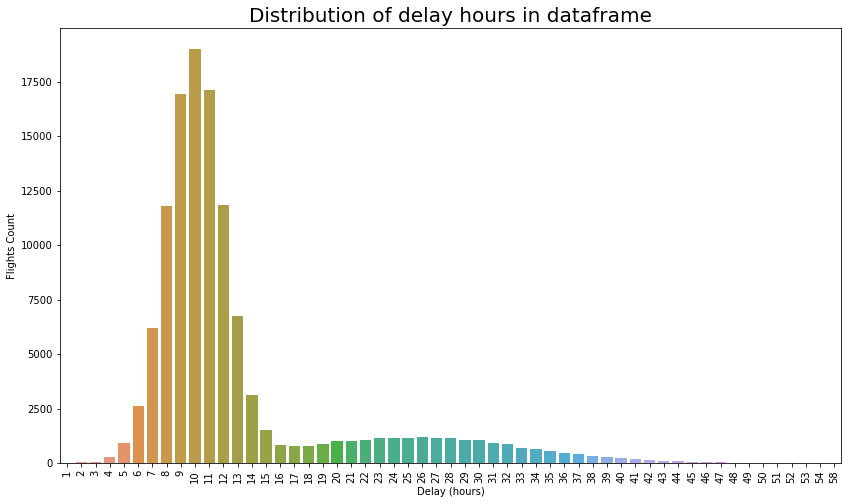

In [17]:
## Task 3
# Cutting off some outliners (1400/1500 days but under 50 flights)
flight_delay = flight[(flight['delay'] >0 ) & (flight['delay'] < 1446 )]
print('Max Delay detected after removing outliners is : ' + str(flight_delay.delay.max()))
print('Min Delay: ' + str(flight_delay.delay.min()))
print('Min Delay: ' + str(flight_delay.delay.mean()))
print('Median Delay: ' + str(flight_delay.delay.median()))
print('Dataframe total lenght: ' + str(len(flight)))
print('Flight with delay > 0: ' + str(len(flight_delay)))
delay_percent = round((len(flight_delay)/len(flight))*100, 2)
print('Percentage of flights with delay in dataframe: ' + str(delay_percent))

fig = plt.figure(figsize=(14,8))
sns.countplot(x='delay', data=flight_delay)
plt.title('Distribution of delay hours in dataframe', size=20)
plt.xticks(rotation=90)
plt.xlabel('Delay (hours)')
plt.ylabel('Flights Count')
plt.show()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

Intercept      769.146468
coach_price      1.821063
dtype: float64

Predicted FirstClass price for a fligth given 700$ Coach Price price is : 2043.8902820450026


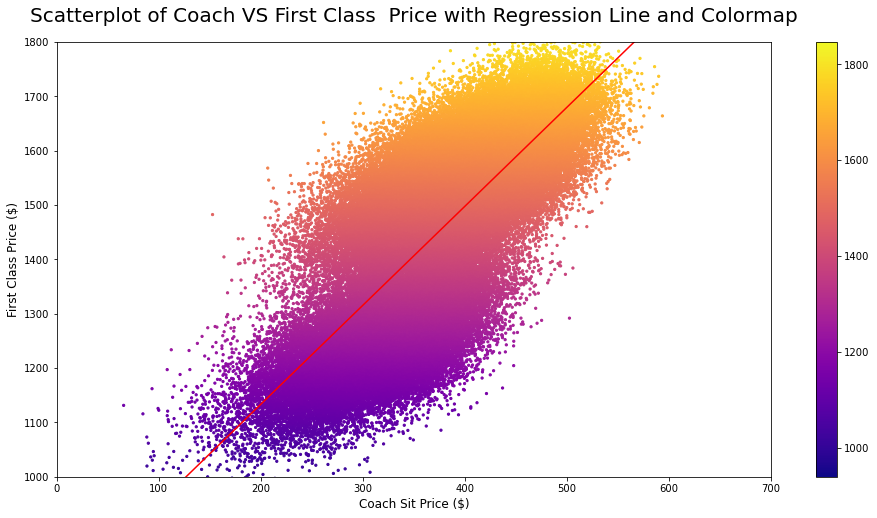

In [26]:
## Task 4

model = sm.OLS.from_formula('firstclass_price~coach_price', flight)
results = model.fit()

# printing parameters to find best line for linear regression
print(results.params)

y_intercept= results.params[0]
slope= results.params[1]

# we now know y value for x = 0 (y_intercept), we will use model to predict 
# the second point of the line, prediction for coach price spent given 1800 first class price

pred_700=  slope * 700 + y_intercept
print('\nPredicted FirstClass price for a fligth given 700$ Coach Price price is : ' + str(pred_700))


plt.figure(figsize=(16,8))
ax = plt.subplot()
# Zoom in, restrcting view
xmin=0
xmax=700
ymin=1000
ymax= 1800
ax.axis([xmin,xmax,ymin,ymax])
# Scatterplot of 
plt.scatter(x='coach_price', y='firstclass_price',c='firstclass_price', cmap='plasma', data=flight, s=5)
plt.plot([0, 700], [y_intercept, pred_700], color = 'r')
plt.colorbar()
plt.title('Scatterplot of Coach VS First Class  Price with Regression Line and Colormap', size=20, pad=20)
ax.set_ylabel('First Class Price ($)',size=12)
ax.set_xlabel('Coach Sit Price ($)',size=12)
plt.show()


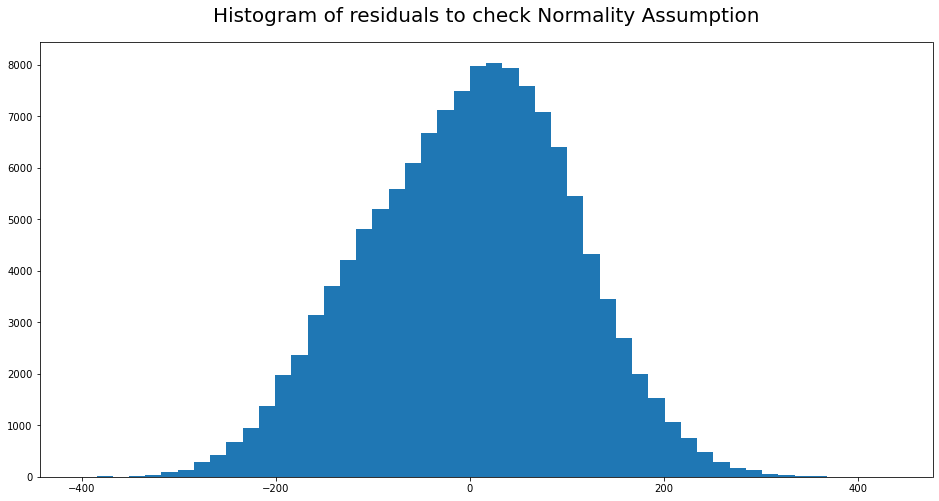

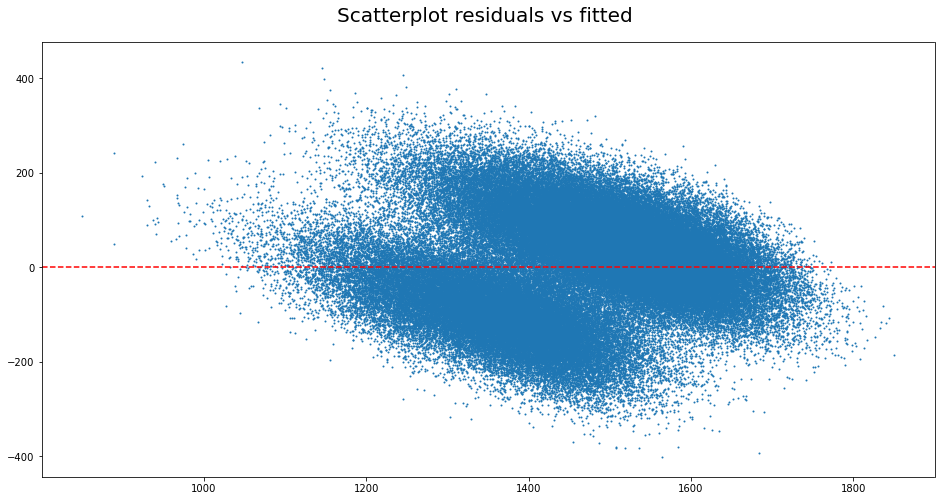

In [22]:
# Calculaitng fitted values 
fitted = results.predict(flight)
# Calculaitng residuals
residuals = flight.firstclass_price - fitted
# Plotting residuals to check Normality assumption
plt.figure(figsize=(16,8))
ax = plt.subplot()
plt.title('Histogram of residuals to check Normality Assumption', size=20, pad=20)
plt.hist(residuals, bins=50)
plt.show()


# Plotting residuals vs fitted to check for Homoscedasticity Assumption
plt.figure(figsize=(16,8))
ax = plt.subplot()
plt.scatter(fitted, residuals, s=1)
plt.axhline(y=0, color='r', linestyle='dashed')
plt.title('Scatterplot residuals vs fitted ', size=20, pad=20)
plt.show()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

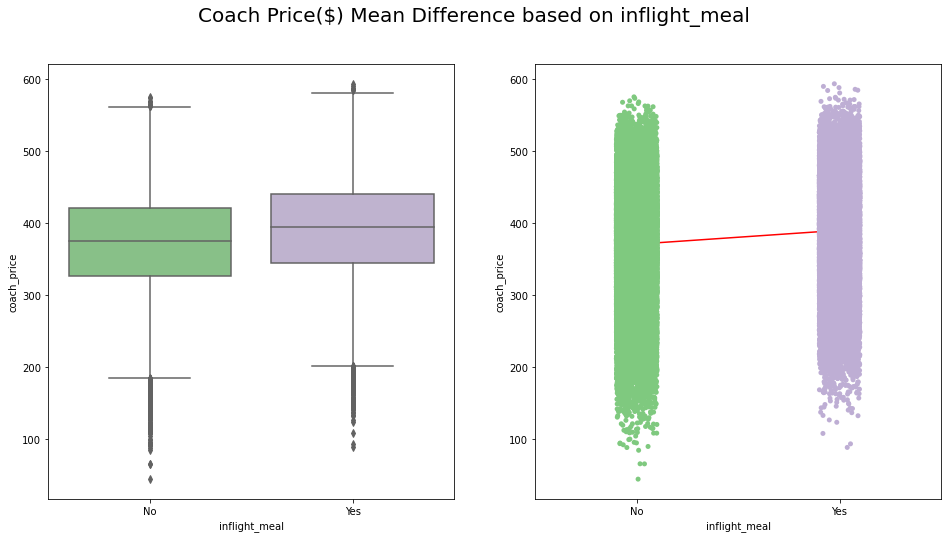

inflight_meal NO: 370.7862857190005
inflight_meal YES: 390.09980701619463
Delta= 19.313521297194143


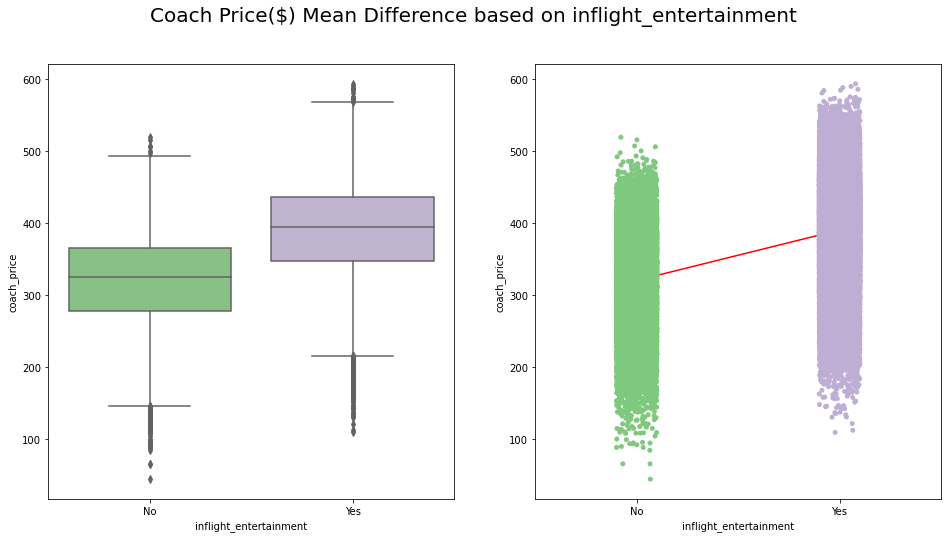

inflight_entertainment NO: 320.42299452469854
inflight_entertainment YES: 390.4881492482712
Delta= 70.06515472357268


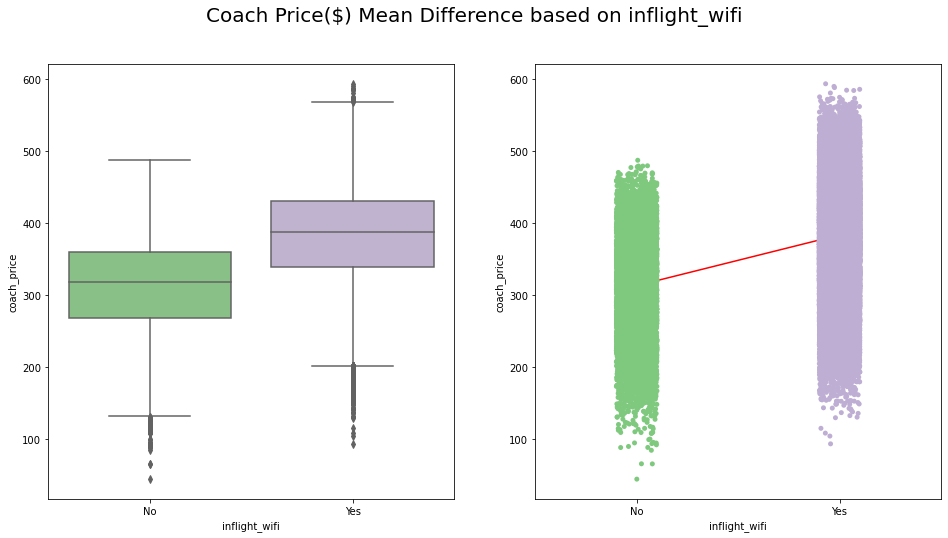

inflight_wifi NO: 313.1856258644528
inflight_wifi YES: 383.6513746295902
Delta= 70.46574876513739


In [27]:
## Task 5

#Defining columns to analyze, then loop through dataframe and 
columns = ['inflight_meal','inflight_entertainment', 'inflight_wifi']
for column in columns:
    no_mean = flight[flight[column]=='No'].coach_price.mean()
    yes_mean = flight[flight[column]=='Yes'].coach_price.mean()
    fig = plt.figure(figsize=(16,8))
    fig.suptitle('Coach Price($) Mean Difference based on {}  '.format(column), size=20)
    plt.subplot(1,2,1)
    sns.boxplot(x=column, y='coach_price', data=flight, order = ['No', 'Yes'], palette='Accent')
    plt.subplot(1,2,2)
    plt.plot([0, 1], [flight[flight[column]=='No'].coach_price.mean(),flight[flight[column]=='Yes'].coach_price.mean()], color='r')
    sns.stripplot(x=column, y='coach_price', data=flight, order = ['No', 'Yes'], palette='Accent')
    plt.show()
    print('{} NO: '.format(column) + str(no_mean))
    print('{} YES: '.format(column)+ str(yes_mean))
    print('Delta= ' + str(yes_mean - no_mean))
   
   



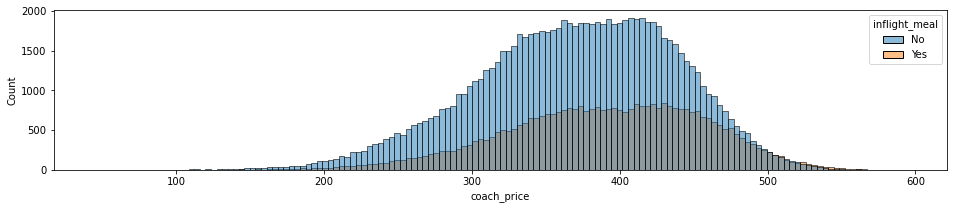

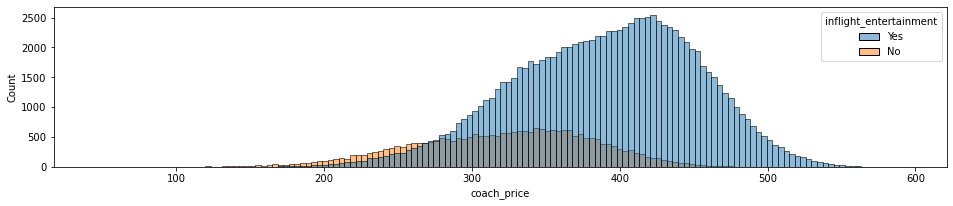

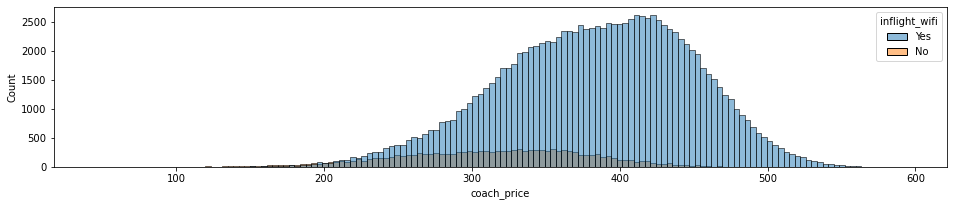

In [39]:
## Task 5
#Showing distribution of prices based on fligth features

# Inflight Meals
fig = plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
# Inflight Entertainment
fig = plt.figure(figsize=(16,10))
plt.subplot(3,1,2)
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
# Inflight WiFi
fig = plt.figure(figsize=(16,10))
plt.subplot(3,1,3)
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()


6. How does the number of passengers change in relation to the length of flights?

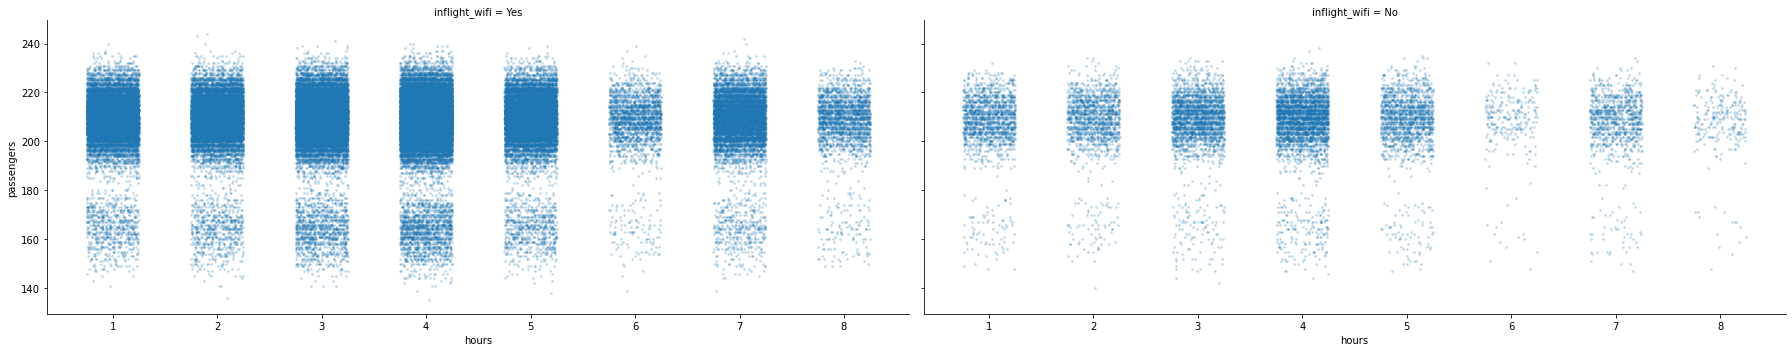

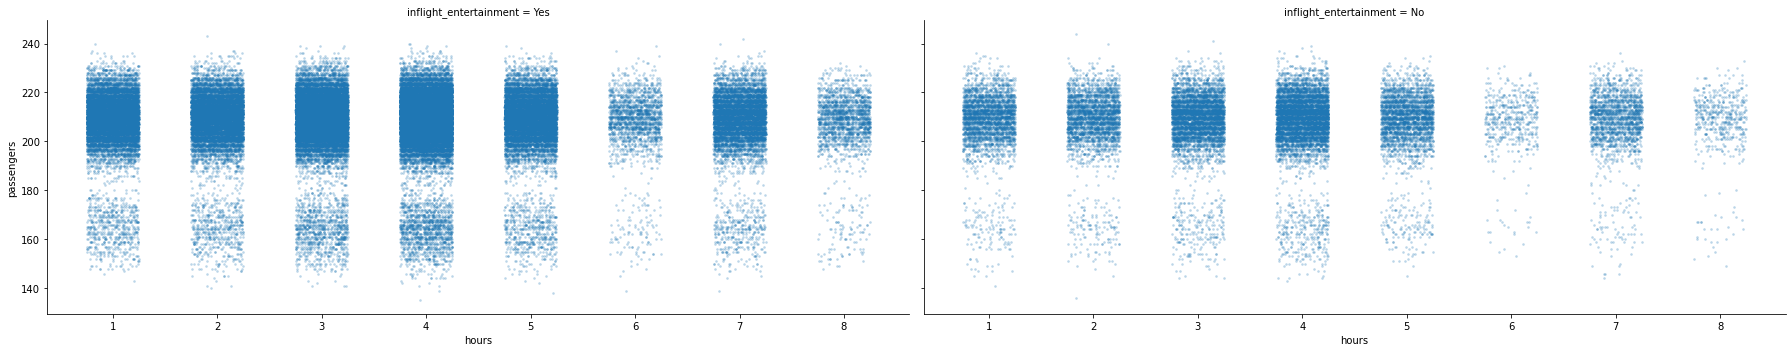

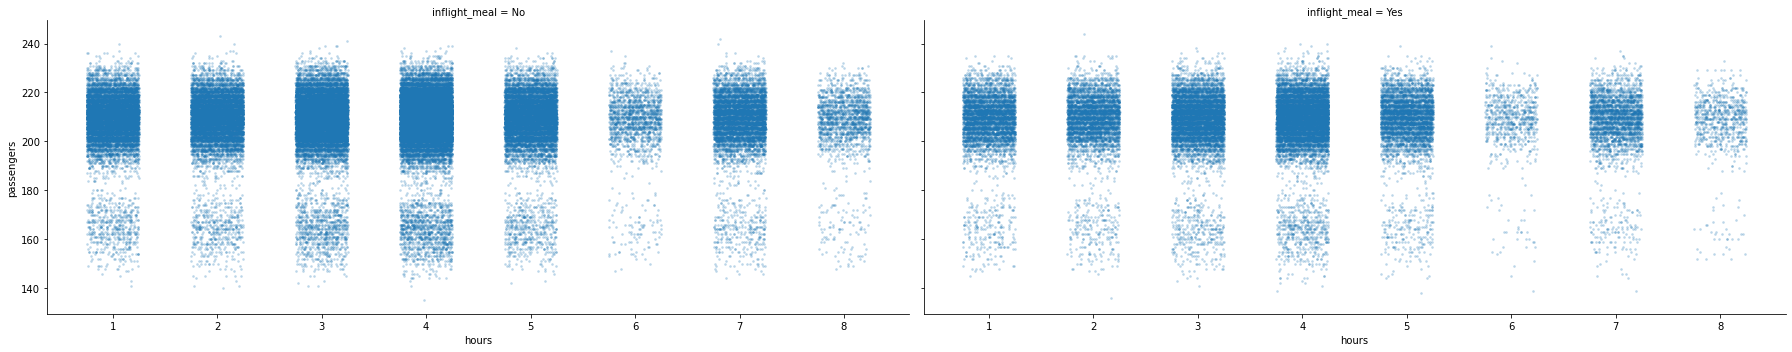

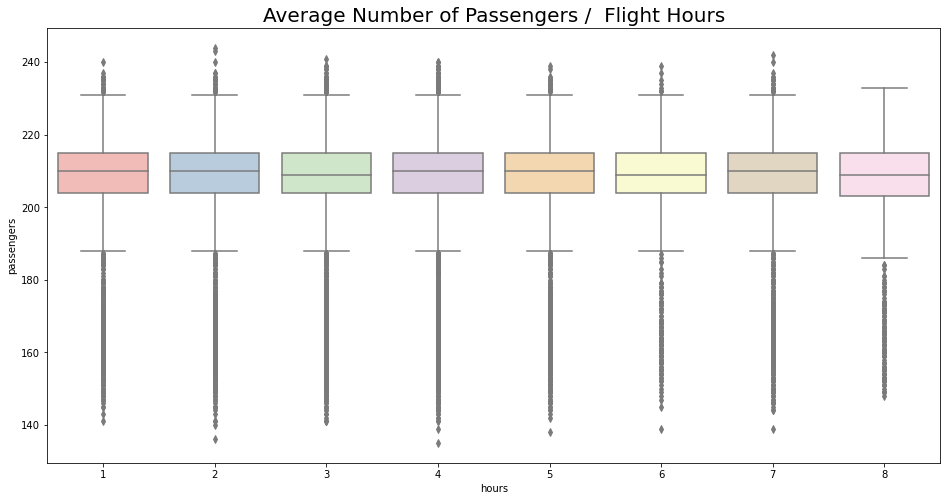

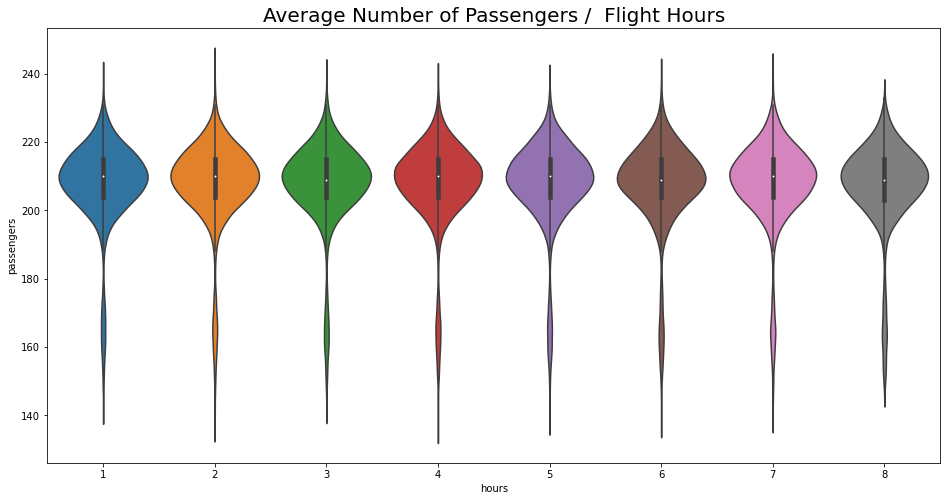

In [45]:
## Task 6
flight.hours =flight.hours.astype('int') 
sns.lmplot(x = "hours", y = "passengers",col='inflight_wifi',  data = flight, x_jitter = 0.25, 
           scatter_kws={"s": 3, "alpha":0.2}, fit_reg = False, aspect = 2.5)
plt.show()


flight.hours =flight.hours.astype('int') 
sns.lmplot(x = "hours", y = "passengers",col='inflight_entertainment',  data = flight, x_jitter = 0.25, 
           scatter_kws={"s": 3, "alpha":0.2}, fit_reg = False, aspect = 2.5)
plt.show()

flight.hours =flight.hours.astype('int') 
sns.lmplot(x = "hours", y = "passengers",col='inflight_meal',  data = flight, x_jitter = 0.25, 
           scatter_kws={"s": 3, "alpha":0.2}, fit_reg = False, aspect = 2.5)
plt.show()



fig= plt.figure(figsize=(16,8))
plt.title('Average Number of Passengers /  Flight Hours', size=20)
sns.boxplot(x=flight.hours, y=flight.passengers, palette = 'Pastel1')
plt.show()

fig= plt.figure(figsize=(16,8))
flight.hours = flight.hours.astype('category')
sns.violinplot(x=flight.hours, y=flight.passengers, data=flight)
plt.title('Average Number of Passengers /  Flight Hours', size=20)
plt.show()

As we can see from above visualization, there is not much difference in passengers average between flights lasting different hours, we can just observe low density in longer flights

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

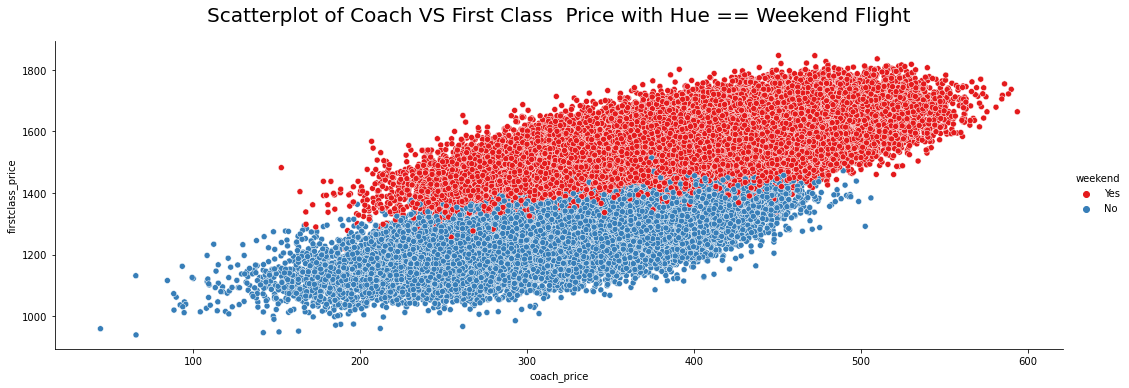

In [50]:
## Task 7

sns.relplot(x='coach_price', y='firstclass_price', data=flight, hue='weekend', kind='scatter', palette ='Set1', aspect=3)
plt.title('Scatterplot of Coach VS First Class  Price with Hue == Weekend Flight', size=20, pad=20)

plt.show()



8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

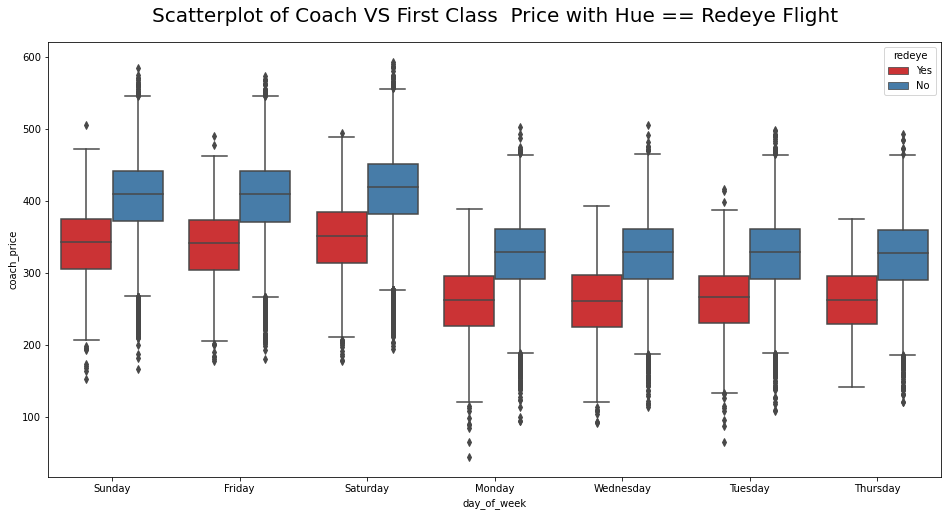

In [48]:
## Task 8
plt.figure(figsize=(16,8))
sns.boxplot(x='day_of_week', y='coach_price', data=flight, hue='redeye', palette ='Set1')
plt.title('Scatterplot of Coach VS First Class  Price with Hue == Redeye Flight', size=20, pad=20)

plt.show()



